# Random forest modeling

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
import push_results as pr

In [2]:
infile1 = open('../data/processed/X_train_trans.pickle','rb')
X_train = pickle.load(infile1)
infile1.close()

infile2 = open('../data/processed/y_train_trans.pickle','rb')
y_train = pickle.load(infile2)
infile2.close()

infile3 = open('../data/model_results/model_results.pickle','rb')
results_dict = pickle.load(infile3)
infile3.close()

In [3]:
clf = RandomForestClassifier(n_jobs=-1, bootstrap=True, random_state=31)
clf.fit(X_train, y_train);

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [4]:
clf.score(X_train, y_train)

1.0

In [5]:
clf.decision_path(X_train);

In [6]:
clf.feature_importances_

array([0.01924493, 0.02925534, 0.06707878, 0.01709795, 0.01701832,
       0.00561251, 0.0869387 , 0.09077931, 0.08208543, 0.02077918,
       0.01927482, 0.02071473, 0.01840618, 0.02086882, 0.02065859,
       0.01904507, 0.01709421, 0.01599164, 0.00867391, 0.01552858,
       0.01830283, 0.01940386, 0.01856689, 0.01665175, 0.01762509,
       0.01085073, 0.02465794, 0.0253177 , 0.02390745, 0.02340555,
       0.0507429 , 0.01110038, 0.00383496, 0.00380264, 0.01847806,
       0.01233361, 0.00942536, 0.01329809, 0.01392401, 0.00391156,
       0.00801326, 0.01159379, 0.0007105 , 0.00218077, 0.00667425,
       0.00104561, 0.00491291, 0.0012991 , 0.00728494, 0.00120294,
       0.00276697, 0.0006266 ])

In [7]:
X_train.columns.shape, clf.feature_importances_.shape

((52,), (52,))

In [8]:
X_train;

In [9]:
pd.concat([pd.Series(X_train.columns), 
           pd.Series(clf.feature_importances_)], axis = 1).sort_values(by=1, 
                                                               ascending = False).head(10).\
                                                                    rename(columns = {0: 'feature', 1:'weight'})

,feature,weight
7,pitch_game,0.090779
6,pitch_season,0.086939
8,pitch_bat_gm,0.082085
2,pitch_number,0.067079
30,stand_r1,0.050743
1,inning,0.029255
27,slg,0.025318
26,ba,0.024658
28,iso,0.023907
29,babip,0.023406


In [10]:
y_pred = clf.predict(X_train)

In [11]:
pr.push_results('randfor_def', 'RandomForestClassifier', 'Default', clf.score(X_train, y_train))

# results_dict.update({'RandomForest': clf.score(X_train, y_train)})

## Cross validation

In [12]:
cvs = cross_val_score(clf, X_train, y_train, cv = 15, scoring = 'accuracy')
np.average(cvs)

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection

0.3713456569270522

In [13]:
pr.push_results('randfor_dv', 'RandomForestClassifier', 'Cross Validation', np.average(cvs))

# results_dict.update({'RandomForest CV': np.average(cvs)})

In [14]:
max_features = len(X_train.columns)
np.sqrt(max_features), np.log2(max_features)

(7.211102550927978, 5.700439718141092)

## Grid search

In [15]:
params = {'n_estimators': [50, 100, 250, 500],
          'max_depth': [3, 4, 5, 7],
          'min_samples_leaf': [50, 100, 250, 500],
          'max_features': ['sqrt', 'log2', 'auto']}

In [16]:
gscv = GridSearchCV(clf, params, n_jobs = -1, verbose = 1)
gscv.fit(X_train, y_train)

# sorted(gscv.cv_results_.keys())

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.0min finished
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=31,
                                 

In [17]:
gscv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [18]:
results = pd.DataFrame(gscv.cv_results_)
results[['rank_test_score', 'mean_test_score', 'param_max_depth',
         'param_max_features', 'param_min_samples_leaf', 'param_n_estimators']].\
            sort_values(by='rank_test_score').head(5)

,rank_test_score,mean_test_score,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators
96,1,0.485301,5,sqrt,50,50
128,1,0.485301,5,auto,50,50
177,3,0.484785,7,auto,50,100
64,3,0.484785,4,log2,50,50
145,3,0.484785,7,sqrt,50,100


In [19]:
gscv.cv_results_['params'][gscv.best_index_]

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'n_estimators': 50}

In [20]:
gscv.cv_results_['mean_test_score'][gscv.best_index_]

0.485300620687818

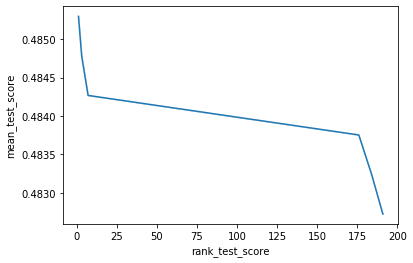

In [21]:
sns.lineplot(x = results.rank_test_score, y = results.mean_test_score)

In [22]:
pr.push_results('randfor_gs', 
                'RandomForestClassifier', 
                'Grid Search', 
                gscv.cv_results_['mean_test_score'][gscv.best_index_])

# results_dict.update({'RandomForest GS': gscv.cv_results_['mean_test_score'][gscv.best_index_]})

In [23]:
# pickle_out = open('../data/model_results/model_results.pickle', 'wb')
# pickle.dump(results_dict, pickle_out)
# pickle_out.close()